To prepare this notebook, I have taken reference from https://www.kaggle.com/code/gadigevishalsai/mall-customer-segmentation-clustering-analysis.

# 1. Import Required the libraries

A Python library makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
## Data preprocessing
import numpy as np
import pandas as pd

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Clustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import the data

I will import the data, which I have taken from the Kaggle's project description in the Data section. Since, this is an unsupervised learning method we have only one dataset. The dataset consists of the columns - CustomerID, Gender, Age, Annual Income, and Spending Score. The task is to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [2]:
data = pd.read_csv("Mall_Customers.csv")

# 3. Data Exploration

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#head
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Null value count
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# datatypes
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# describe 
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


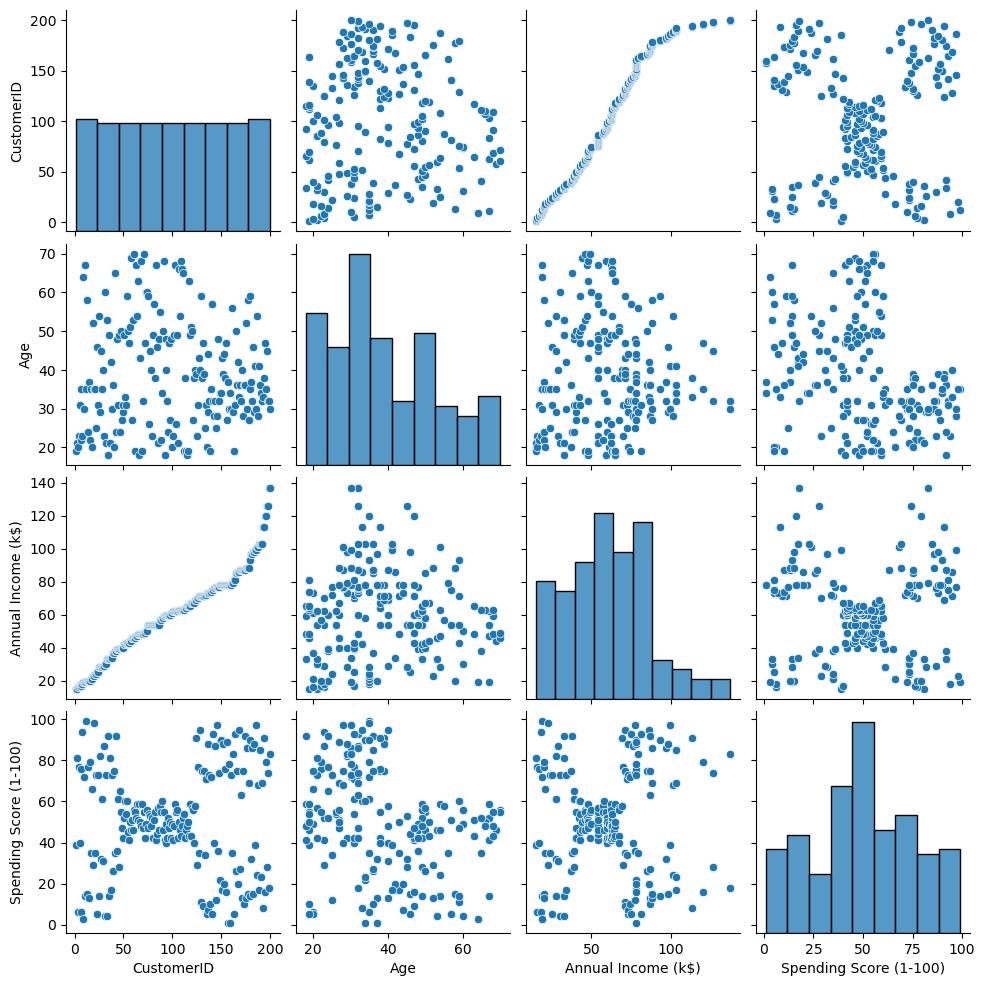

In [8]:
sns.pairplot(data)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

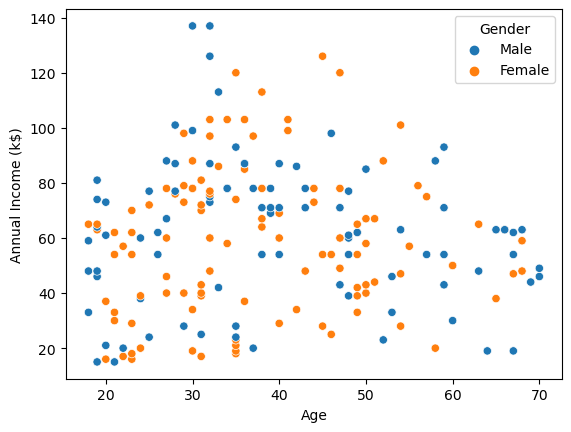

In [9]:
sns.scatterplot(data = data, x = "Age", y = "Annual Income (k$)", hue = "Gender")

From the above graph, we can see that there is no significant relationship between Age and Annual Income (k$)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

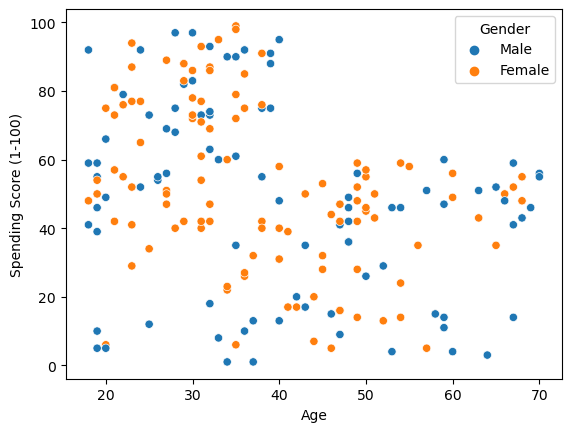

In [10]:
sns.scatterplot(data = data, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

From the above graph, we can see that there is no significant relationship between Age and Spending Score (1-100).

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

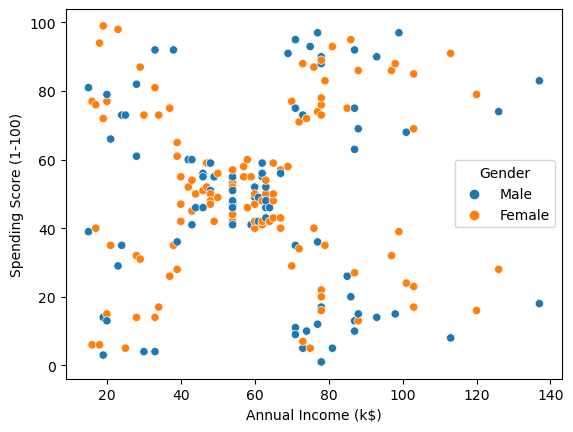

In [11]:
# Scatterplot between Annual Income and Spending Score

sns.scatterplot(data = data, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

### Converting Gender columns male as 0 female as 1

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

# 4. Dendrogram Data Visualization

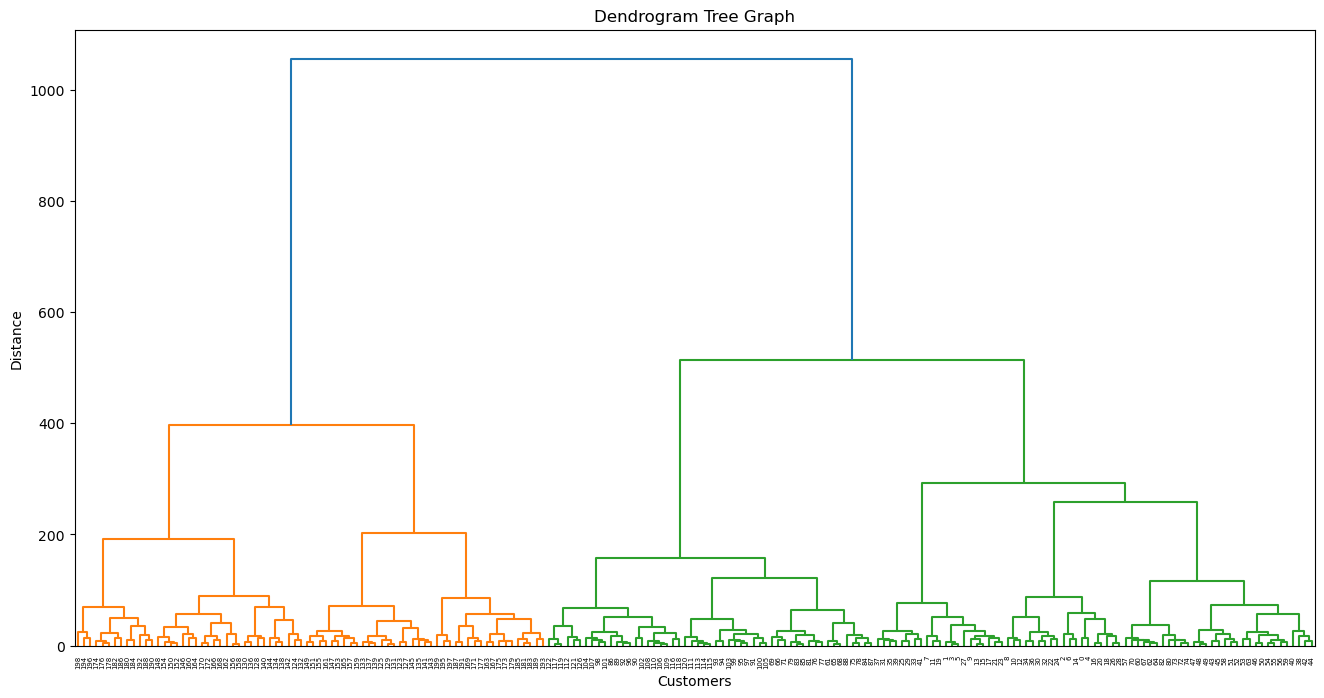

In [13]:
import scipy.cluster.hierarchy as clus

plt.figure(1,figsize=(16,8))
dendrogram = clus.dendrogram(clus.linkage(data,method="ward"))

plt.title("Dendrogram Tree Graph")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# 5. Fitting the Hierarchial clustering to the dataset with n=5

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
y_means = model.fit_predict(data)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

## Visualizing the number of cluster n=5

* Cluster 1: Customers with High Income and Low spending.
* Cluster 2: Customers with Low Income and Low spending.
* Cluster 3: Customers with Medium Income and Medium spending.
* Cluster 4: Customers with Low Income and Low spending.
* Cluster 5: Customers with Low Income and High spending.

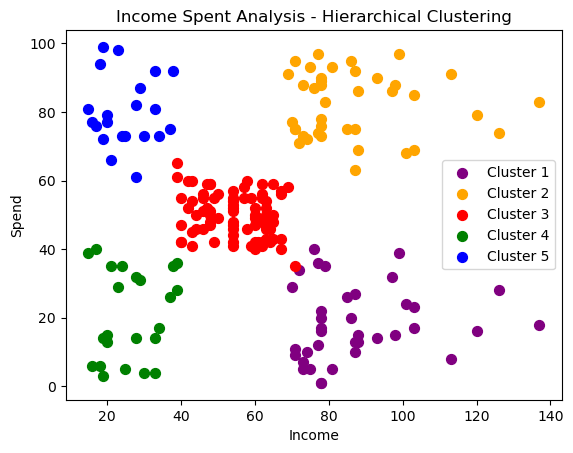

In [15]:
x= data.iloc[:,[3,4]].values
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c="purple",label="Cluster 1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c="orange",label="Cluster 2")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c="red",label="Cluster 3")
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c="green",label="Cluster 4")
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c="blue",label="Cluster 5")
plt.title("Income Spent Analysis - Hierarchical Clustering")
plt.xlabel("Income")
plt.ylabel("Spend")
plt.legend()
plt.show()

# 6. Conclusion

Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.